## Laboration 1, Databehandling
#### _Björn Winterfjord_

#### Uppgift a)
Vi importerar nödvändiga bibliotek, och läser in filen College.csv.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

college = pd.read_csv("College.csv")

#### Uppgift b)
Vi observerar att datasetet har "College" som en av kategorierna. Eftersom collegenamnen är unika, vore det lämpligt att använda dessa som index. Detta kan vi åstadkomma på olika sätt, här nedan visas två.

In [4]:
college2=pd.read_csv("College.csv", index_col=0)

college3=college.rename({"Unnamed: 0": "College"}, axis=1)
college3=college3.set_index("College")

#### Uppgift c)
Av de två metoderna ovan, väljer vi _set_index_-metoden, och sparar den alltså under namnet _college_. Vi gör en snabb undersökning av några statistiska variabler hos datasetet med hjälp av _describe_.

In [5]:
college=college3
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


#### Uppgift d)
Vi undersöker om det finns några intressanta samband mellan tre av variablerna (_Andel Top 10%-studenter_, _Ansökningar_ samt _Antagna_), genom att göra _scatter plots_. Se resultat här nedan.

Det kanske tydligaste sambandet ser vi mellan __Apps__ (_ansökningar_) och __Enroll__ (_antagna_), vilket inte är oväntat. Har man få ansökningar kan man bara ta emot få studenter, medan de stora universiteten får många ansökningar, och många antagna studenter. Det är rimligt att anta att de "finaste" skolorna (_Ivy League_) har relativt få antagna i förhållande till antalet ansökningar, men detta ska vi undersöka senare.

Intressant är också att vi i __Apps__-kolumnen har en utliggare (_Rutgers University_) med mer än dubbelt så många ansökningar som någon annan skola. Det är möjligt att det är en felaktig siffra, men vi låter den vara kvar.

Det är inte lika tydliga trender när vi plottar __Top10perc__ mot __Apps__ eller __Enroll__. (__Top10perc__ anger alltså hur stor andel av varje colleges studenter som tillhörde de 10% högst presterande i High School). Det kanske inte heller var väntat: Bland de mest exklusiva skolorna, alltså de med högst värden på __Top10perc__, finns såväl stora som små skolor, alltså höga och låga värden på __Apps__ och __Enroll__. Och samma sak med de "sämre" skolorna, det finns både stora och små skolor av den typen också. Inga tydliga trender här alltså, utan ganska låg korrelation.



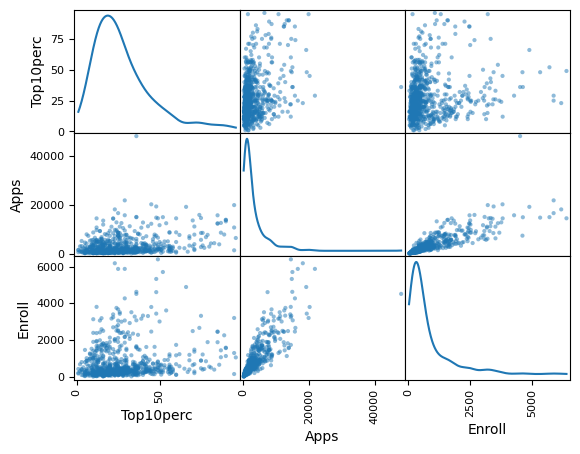

In [6]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]], diagonal="kde")
plt.show()

#### Uppgift e)
Nu ska vi jämföra __Out-of-state tuition__ (den årliga avgift man betalar till skolan om man bor i en annan delstat) för privatskolor och publika skolor. Detta gör vi med hjälp av en _boxplot_ (ibland kallat _lådagram_ på svenska).

Vi misstänker att privata skolor överlag har högre avgifter, och boxploten ger oss rätt: Medianavgiften ligger betydligt högre hos de privata skolorna än de publika. Det är t.o.m. så att den 25:e percentilen hos de privata ligger _över_ den 75:e percentilen bland de publika. Det kanske mest förvånande är kanske istället att de "billigaste" skolorna ligger på ungefär samma nivå bland publika och privata.

Överlag kan man därmed säga att de privata skolorna har betydligt större spridning bland sina avgifter; de lägsta i paritet med de publikas lägsta, men även många skolor i ett betydligt dyrare skikt. Värt att notera är dock det stora antalet utliggare bland de publika skolorna, här finns alltså några skolor som skiljer sig rejält från det mittersta kvartilintervallet. Detta gör att boxploten blir ett något trubbigt jämförelseverktyg i detta fall.

<function matplotlib.pyplot.show(close=None, block=None)>

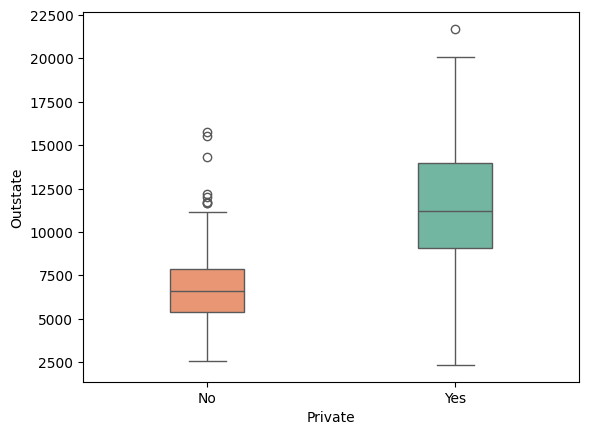

In [13]:
sns.boxplot(data=college, x="Private", y="Outstate", hue="Private", width=0.3, order=["No", "Yes"], palette="Set2")
plt.show

#### Uppgift f)

Nu delar vi upp skolorna efter hur stor andel av deras studenter som presterade bland de högsta 10% i High School. De skolor med en sådan andel över 50% kallar vi _Elite_. En _value_counts_ ger vid handen att det finns 78 skolor som tillhör _Elite_-gruppen. Nu ska vi göra en liknande jämförelse som i förra uppgiften, vi ska jämföra __Out-of-state__-kostnaden för skolor i _Elite_-gruppen, med övriga skolor. Vi misstänker att kostnaden överlag är högre bland _Elite_-skolorna, men det är även intressant att jämföra utfallet med föregående uppgift, då det troligen finns en tydlig korrelation mellan att tillhöra _Elite_ och att vara _Private_.

När vi tittar på boxploten så ser vi mycket riktigt att mediankostnaden, och även Q1 och Q3, ligger betydligt högre hos _Elite_-skolorna, vilket nog inte förvånar någon. Dock ser vi att de allra dyraste skolorna ligger på ungefär samma nivå, oavsett _Elite_ eller ej. Detta, i kombination med det faktum att vi har väldigt korta avstånd mellan __Median - Q3 - Max__ hos _Elite_-skolorna (istället för den mer förväntade normalfördelningen), gör att vi kan misstänka att det finns en rekommenderad(?) maxgräns kring $ 20 000/år. Många av _Elite_-skolorna ligger nära denna maxgräns, och även ett fåtal ur den övriga gruppen. (Vi ser även ett par utliggare, som kanske har dispens att ta ut en högre kostnad.)

Jämför vi denna boxplot med boxploten i uppgift e), så inser vi att det är enbart privatskolor som tar ut de högre kostnaderna. Vi kan också konstatera att då vi jämför privata pch publika skolor, så är det jämnt skägg i det lägre kostnadsskiktet (kring $ 2500), medan det (som nyss konstaterats) är jämnt vid den allra högsta gränsen då vi jämför _Elite_ med övriga. Överlag ligger dock kostnaderna naturligtvis betydligt högre hos såväl _Elite_ som _Private_, och dessa två grupper överlappar varandra troligen till stor del.

Elite
No     699
Yes     78
Name: count, dtype: int64


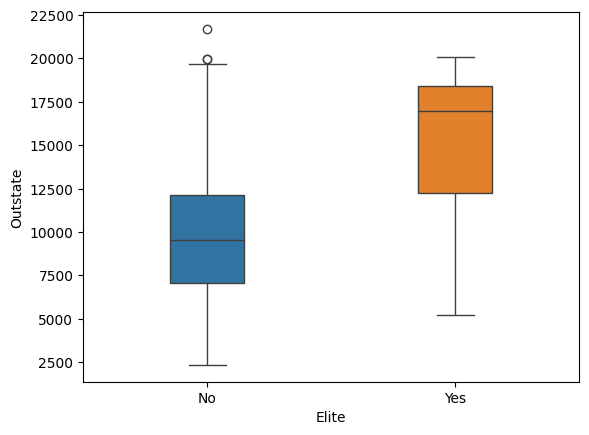

In [11]:
college["Elite"]=pd.cut(college["Top10perc"], [0, 50, 100], labels=["No", "Yes"])

print(college["Elite"].value_counts())

sns.boxplot(data=college, x="Elite", y="Outstate", hue="Elite", width=0.3)
# college.boxplot(by="Elite", column="Outstate")
plt.show()

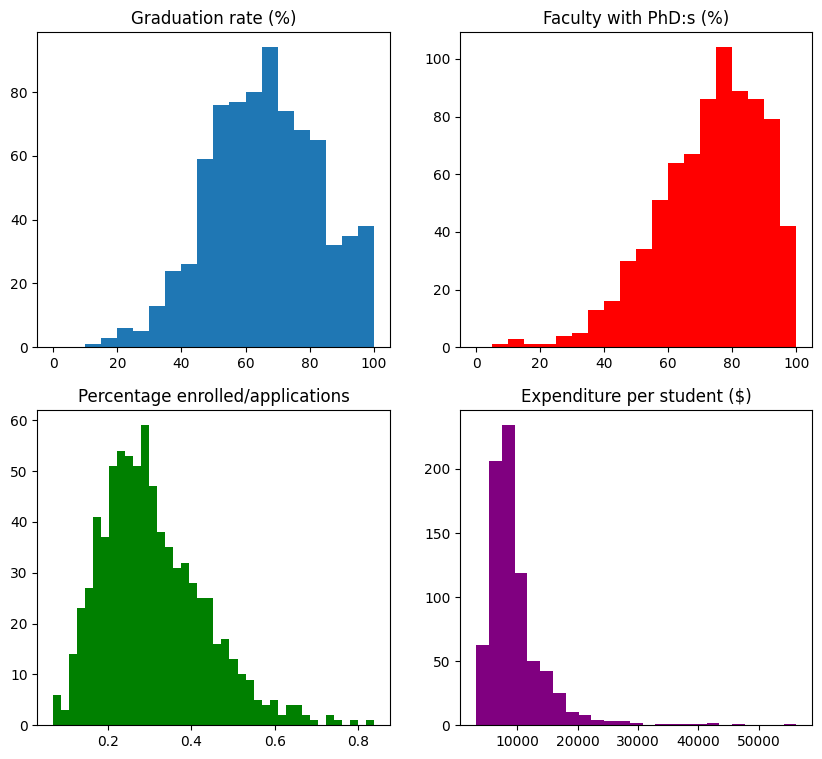

In [123]:
# g)

bins=np.linspace(0, 100, 21)

plt.figure(figsize=(10,9))

plt.subplot(2,2,1)
plt.hist(college["Grad.Rate"], bins=bins)       # One value of 118 is obviously wrong, and dropped
plt.title("Graduation rate (%)")

plt.subplot(2,2,2)
plt.hist(college["PhD"], bins=bins, color="r")             # One value of 103 is obviously wrong, and dropped
plt.title("Faculty with PhD:s (%)")

plt.subplot(2,2,3)
plt.hist(college["Enroll"]/college["Apps"], bins=40, color="g")
plt.title("Percentage enrolled/applications")

plt.subplot(2,2,4)
plt.hist(college["Expend"], bins=25, color="purple")
plt.title("Expenditure per student ($)")

plt.show()

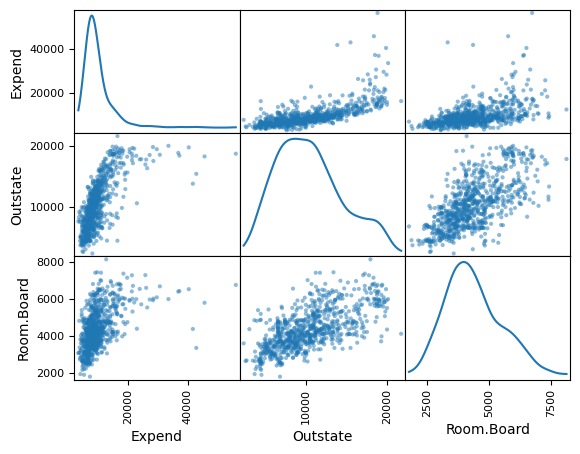

In [126]:
list2=["Expend", "Outstate", "Room.Board"]

pd.plotting.scatter_matrix(college[list2], diagonal="kde")
plt.show()